<a href="https://colab.research.google.com/github/ophirlevinson/fraudulent-_detection/blob/master/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection 
  1. Import data
  2. Visualize 
  3. Pre-process
  4. Create a logistic model
  5. Check model and predit


In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
import seaborn as sns

## Import data

In [98]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,56730.0,1.533514,-0.158796,-0.502469,-0.879370,-0.076440,-0.888371,0.039385,-0.438302,-1.321205,0.649438,-0.723597,-0.095219,1.766666,-0.237577,0.317994,0.899483,0.016156,-1.514114,0.945673,0.162893,0.144713,0.459075,-0.274575,-0.359639,0.960714,-0.037003,-0.017782,-0.005465,1.00,0
1,40862.0,-0.762229,1.006803,1.517650,-0.184517,-0.039635,-0.292945,0.402122,0.287660,-0.293311,0.163098,1.518887,0.158671,-1.322307,0.551101,0.534943,0.078783,-0.230399,-0.241164,-0.151696,0.111166,-0.181818,-0.453541,0.036160,0.169050,-0.315752,0.079896,0.381840,0.165352,1.29,0
2,138803.0,-0.765822,0.330092,-0.979615,-0.522699,-0.626116,1.817246,1.938749,-2.153257,0.326950,-0.402325,-0.159853,0.518916,0.102071,-0.042909,0.233590,-0.984311,0.492538,-2.344768,-1.280812,-1.175462,1.201200,-0.667887,-1.603821,-0.886016,-1.422754,0.192424,0.426222,-0.346974,627.95,0
3,39081.0,0.869820,-0.862217,0.770348,0.326967,-1.147097,-0.221127,-0.386228,-0.042937,0.815630,-0.371030,-0.784228,0.531027,0.857514,-0.450488,0.677958,0.466316,-0.414514,-0.035017,0.010530,0.391486,0.173985,0.244604,-0.252749,0.157084,0.209962,1.107483,-0.069121,0.047255,204.00,0
4,138358.0,0.175218,0.407749,-0.410562,-0.888346,1.059853,-1.657298,1.179999,-0.622350,0.466434,-0.254932,-1.056950,-0.120956,-0.307275,0.214762,-0.243913,-0.108631,-1.032610,0.034260,-1.075433,-0.312488,0.454586,1.553272,0.040101,0.071228,-1.609283,-0.600787,0.047470,0.149104,0.90,0


## Visualize the data
The following graphs shows - 
1. The dataset is unblanaced in terms of amounts (see histogram) and in terms of the total fraudulent vs non-fraudulent transactions
2. The fraudulent transactions seems to be in small amounts cases. So if our model should not detect frauds on high amounts.


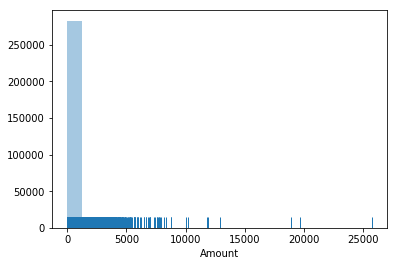

In [103]:
sns.distplot(df['Amount'], bins=20, kde=False, rug=True);

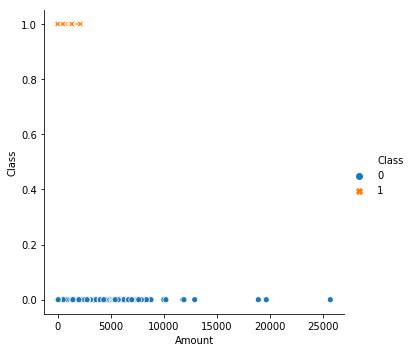

In [94]:
sns.relplot(x="Amount", y="Class", data=df, hue="Class", style="Class");

## Preprocessing
1. Split the data using train_test_split
2. Normalize the data (training & testing)

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [105]:
x = df.iloc[:,:-1]
y = df['Class']
X_train , X_test , y_tran , y_test = train_test_split(x,y, test_size=0.35)
X_train = (X_train-X_train.mean()) / X_train.std()
X_test = (X_test-X_test.mean()) / X_test.std()
print("total tests:{0}, total trains:{1}".format(len(X_test), len(y_train)))

total tests:99683, total trains:185124


## Create a model
Create and train (fit) a logistic regression model

In [163]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test)) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9982845620617357


## Make some predictions
We can see the model score is pretty high. By printing the confustion matrix we can see that 171 true fraudulent transactions that were wrongly predicted

In [164]:
y_pred = logistic.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[99512,     0],
       [  171,     0]])

In [170]:
wrong_pred_indices = [i for i, val in enumerate(y_test-y_pred) if val==1]
print("for example in index {0}, true value was {1} while predicted value was {2}".format(2,y_test.iloc[wrong_pred_indices[2]],y_pred[wrong_pred_indices[2]]))



for example in index 2, true value was 1 while predicted value was 0
